In [78]:
import os
from glob import glob
import shutil
import matplotlib.pyplot as plt
import altair as alt
import re
import math
import numpy as np
import pandas as pd
from scipy.stats import chisquare
import csv

import ot

from scipy.stats import wasserstein_distance

In [79]:
directory = os.getcwd()
print(directory)

/Users/hbakt/Desktop/code/rolling-dragons/BB_result_scripts


In [80]:
def kl(P, Q):
    kl = 0
    got_zero = False
    for p,q in zip(P, Q):
        if (p != 0) and (q != 0):
            kl += p * math.log(p/q)
        else:
            got_zero = True
            #
    # if (got_zero):
    #     print(" got zero")
    #     print(ms)
    #     print(other)
    #     print("kl: ", kl)
    return kl


In [81]:
def chi_stat(obs_freq, expected_freq):
    return sum([ ((o-e)**2)/e for o,e in zip(obs_freq, expected_freq) if e>0])

In [82]:
# Example objects
def write_to_CSV(out_name: str, our_probs, IPC_probs, Bullet_probs, experiment_probs, outcomes, total_smaples):
    with open(out_name, mode="w", newline="") as file:
        writer = csv.writer(file)

        # Write header
        writer.writerow(["Outcome", "Ours", "IPC", "Bullet", "Experiment", "exp_sample_count"])

        # Write data
        for i in range(len(outcomes)):
            row = [
                outcomes[i],
                our_probs[i],
                IPC_probs[i],
                Bullet_probs[i],
                experiment_probs[i],
                int(experiment_probs[i] * total_smaples)
            ]
            writer.writerow(row)

In [159]:
def plot_simulation_vs_experiment(outcomes, ours_probs, IPC_prob, Bullet_prob, experiment_prob, experiment_title, theoretical_probs = None,
                                  save = False, save_title = "experiment probs", total_rolls = -1):
    width = 0.15
    if theoretical_probs is not None:
        plt.bar(np.array(outcomes)-3*width, theoretical_probs, width=width,  label = "Theoretical", color = "red")
        # deviations = [math.sqrt(p*(1-p)/total_rolls) for p in theoretical_probs]
        # plt.errorbar(np.array(outcomes)-3*width, theoretical_probs, yerr=deviations, fmt="o", color="black")

    plt.bar(np.array(outcomes)-2*width, ours_probs, width=width,  label = "Ours", color = "orange")
    plt.bar(np.array(outcomes)-width,   Bullet_prob, width=width, label = "Bullet", color = "brown")
    plt.bar(np.array(outcomes)-0.0,     IPC_prob, width=width, label = "IPC", color = "teal")
    plt.bar(np.array(outcomes)+width,   experiment_prob, width=width, label = experiment_title, color = "black")
    # plt.title(save_title)
    # plt.xlabel("Outcome")
    # plt.ylabel("Probability")
    # plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks([])
    # plt.yticks([])
    plt.tight_layout()
    if save:
        plt.savefig("./experiment_plots/" + save_title + ".png", dpi=800)
    plt.show()

total samples 1015


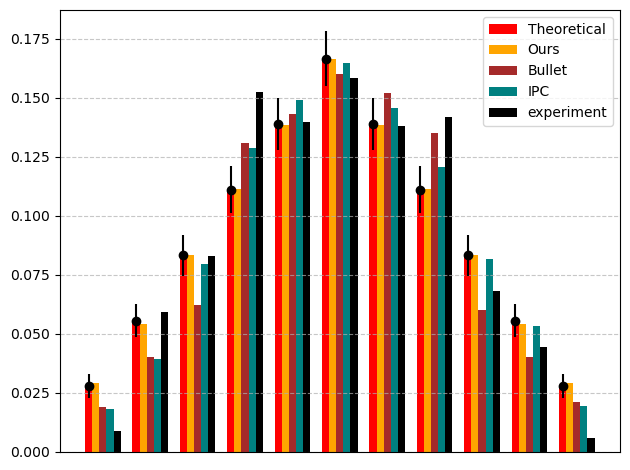

In [149]:
# ------ Hendecahedron 2d6 trials ------

MS_probs     = [0.029, 0.054, 0.083, 0.111, 0.138, 0.166, 0.138, 0.111, 0.083, 0.054, 0.029]
MS_probs = [p/(sum(MS_probs)) for p in MS_probs]
Bullet_probs = [0.019, 0.040, 0.062, 0.131, 0.143, 0.160, 0.152, 0.135, 0.060, 0.040, 0.021]
# Bullet_probs = [p/(sum(Bullet_probs)) for p in Bullet_probs]
IPC_probs    = [0.018, 0.039, 0.079, 0.128, 0.148, 0.164, 0.145, 0.120, 0.081, 0.053, 0.019]
IPC_probs = [p/(sum(IPC_probs)) for p in IPC_probs]

# observed_freq = [28, 53, 21]
observed_freq_FDM = [2,5,8,40,34,30,31,28,23,4,1]
observed_freq_F170 = [0,8,3,22,27,28,20,19,18,9,0]
observed_freq_SLS = [ 0,13,30,53,34,63,44,54,33,17,1]
observed_freq_SLA = [8,33,52,102,97,105,92,95,48,27,5]
observed_freq_SLA2 = [1,27,32,53, 45,56,48, 49,21,18,1]
observed_freq = [a+b for a,b in zip(observed_freq_SLA, observed_freq_SLA2)]

observed_probs = [p/sum(observed_freq) for p in observed_freq]
m = sum(observed_freq)

# observed_probs = [0,0,0,0,0,0,0,0,0,0,0]
# IPC_probs = [0,0,0,0,0,0,0,0,0,0,0]
#total rolls
print("total samples", sum(observed_freq))

theoretical_probs = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]

outcomes = [2,3,4,5,6,7,8,9,10,11,12]
plot_simulation_vs_experiment(outcomes, MS_probs, IPC_probs, Bullet_probs, observed_probs, "experiment",
                              theoretical_probs=theoretical_probs,
                              save=False, save_title="2d6_experiment", total_rolls = sum(observed_freq))
# write_to_CSV("./CSVs/Hendecahedron_2d6_SLA2.csv", MS_probs, IPC_probs, Bullet_probs, observed_probs, outcomes, m)

In [39]:
print( " symmetric KL Divergence: KL(P,Q)/2. + KL(Q,P)/2.  ")
print("MS-complex vs observed ", (kl(MS_probs, observed_probs) + kl(observed_probs, MS_probs))/2.)
print("Bullet vs observed ", (kl(Bullet_probs, observed_probs) + kl(observed_probs, Bullet_probs))/2.)
print("IPC vs observed ", (kl(IPC_probs, observed_probs) + kl(observed_probs, IPC_probs))/2.)
print("--------------")
print("MS-complex vs Bullet ", (kl(MS_probs, Bullet_probs) + kl(Bullet_probs, MS_probs))/2.)
print("MS-complex vs IPC ", (kl(MS_probs, IPC_probs) + kl(IPC_probs, MS_probs))/2.)
print("Bullet vs IPC ", (kl(Bullet_probs, IPC_probs) + kl(IPC_probs, Bullet_probs))/2.)


 symmetric KL Divergence: KL(P,Q)/2. + KL(Q,P)/2.  
MS-complex vs observed  0.03635431357059624
Bullet vs observed  0.014904924393803622
IPC vs observed  0.014591566580096062
--------------
MS-complex vs Bullet  0.019113250755325016
MS-complex vs IPC  0.009452538971524625
Bullet vs IPC  0.008077912792285202


bullet invalids:  3.0566640000000294
total samples 100


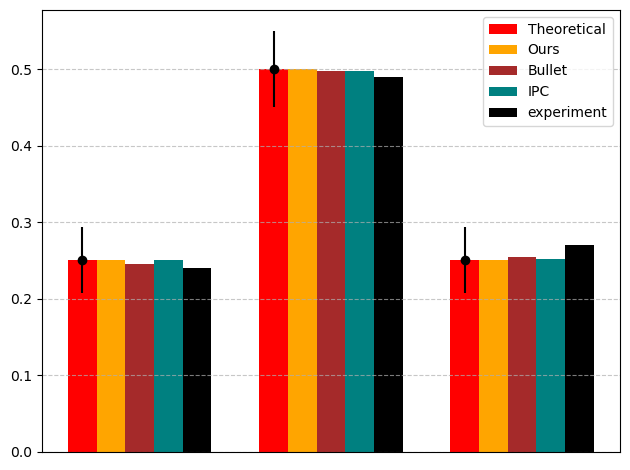

In [150]:
# ------ binomial n=2 trials ------
MS_probs     = [0.25, 0.50, 0.25]
MS_probs = [p/(sum(MS_probs)) for p in MS_probs]
Bullet_probs = [0.245, 0.259762 + 0.237716, 0.255]
# Bullet_probs = [p/(sum(Bullet_probs)) for p in Bullet_probs]
print("bullet invalids: ", (1- sum(Bullet_probs))*1212)
IPC_probs = [0.25, 0.497, 0.2518]
IPC_probs = [p/(sum(IPC_probs)) for p in IPC_probs]

observed_freq = [24, 49, 27]
observed_probs = [p/sum(observed_freq) for p in observed_freq]
m = sum(observed_freq)
#total rolls
print("total samples", sum(observed_freq))

theoretical_probs = [1/4,2/4,1/4]

outcomes = [0,1,2]
plot_simulation_vs_experiment(outcomes, MS_probs, IPC_probs, Bullet_probs, observed_probs, "experiment",
                              theoretical_probs=theoretical_probs,
                              save=False, save_title="binom2_experiments", total_rolls=sum(observed_freq))
# write_to_CSV("./CSVs/binom2.csv", MS_probs, IPC_probs, Bullet_probs, observed_probs, outcomes, m)

total samples 329


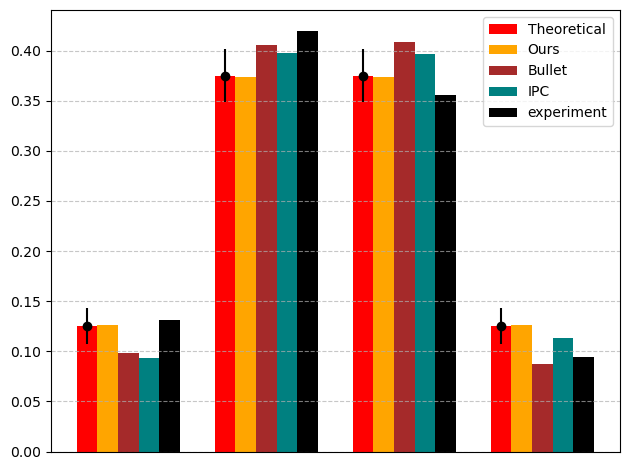

In [151]:
# ------ binomial n=3 trials ------
Bullet_b3_probs = [0.0986715, 0.404706, 0.408439, 0.0873413]
Bullet_b3_probs = [c/sum(Bullet_b3_probs) for c in Bullet_b3_probs]
IPC_b3_probs    = [0.093197, 0.397403, 0.396383, 0.113017]
IPC_b3_probs = [c/sum(IPC_b3_probs) for c in IPC_b3_probs]
Ours_b3_probs = [0.126, 0.3739, 0.3739 , 0.126]
Ours_b3_probs = [p/sum(Ours_b3_probs) for p in Ours_b3_probs]

expected_b3_probs = Ours_b3_probs

observed_b3_freq1 = [1, 47, 49, 8]
observed_b3_freq2 = [43, 138, 117, 31]


observed_b3_freq = observed_b3_freq2
m = sum(observed_b3_freq)
observed_b3_probs = [c/sum(observed_b3_freq) for c in observed_b3_freq]

theoretical_probs= [1/8,3/8,3/8,1/8]
# roll count
print("total samples", sum(observed_b3_freq))

outcomes = [0,1,2,3]
plot_simulation_vs_experiment(outcomes, Ours_b3_probs, IPC_b3_probs, Bullet_b3_probs, observed_b3_probs, "experiment",
                              theoretical_probs=theoretical_probs,
                              save=False, save_title="binom3_experiments", total_rolls=sum(observed_b3_freq))
# write_to_CSV("./CSVs/binom3.csv", Ours_b3_probs, IPC_b3_probs, Bullet_b3_probs, observed_b3_probs, outcomes, m)

total samples 404


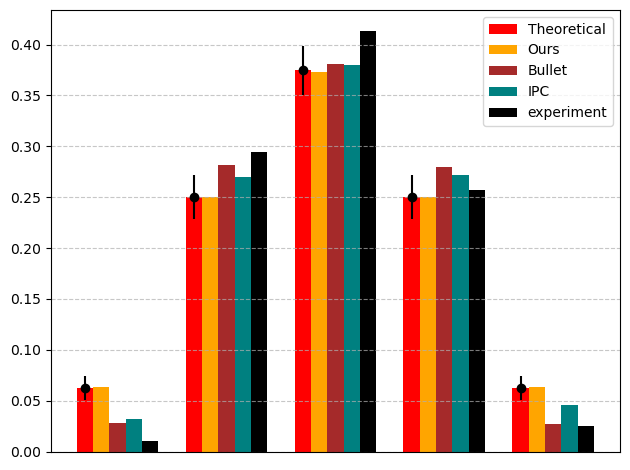

In [152]:
# ------ binomial n=4 trials ------
observed_b4_freq = [4, 119, 167, 104, 10]
observed_b4_prob = [p/sum(observed_b4_freq) for p in observed_b4_freq]

Ours_b4_prob    = [0.063, 0.250, 0.373, 0.25,  0.063]
Ours_b4_prob    = [p/sum(Ours_b4_prob) for p in Ours_b4_prob]
Bullet_b4_probs = [0.028,  0.282, 0.381, 0.28, 0.027]
IPC_b4_probs    = [0.032,  0.269, 0.379, 0.271,  0.046]
IPC_b4_probs    = [p/sum(IPC_b4_probs) for p in IPC_b4_probs]

theoretical_probs = [1/16,4/16,6/16,4/16,1/16]
# totall rolls
print("total samples", sum(observed_b4_freq))

outcomes = [0,1,2,3,4]
plot_simulation_vs_experiment(outcomes, Ours_b4_prob, IPC_b4_probs, Bullet_b4_probs, observed_b4_prob, "experiment",
                              theoretical_probs=theoretical_probs,
                              save=False, save_title="binom4_experiments", total_rolls=sum(observed_b4_freq))
# write_to_CSV("./CSVs/binom4.csv", Ours_b4_prob, IPC_b4_probs, Bullet_b4_probs, observed_b4_prob, outcomes, sum(observed_b4_freq))

bullet invalids:  0.10511999999999999 %  127.40543999999998
total samples 331


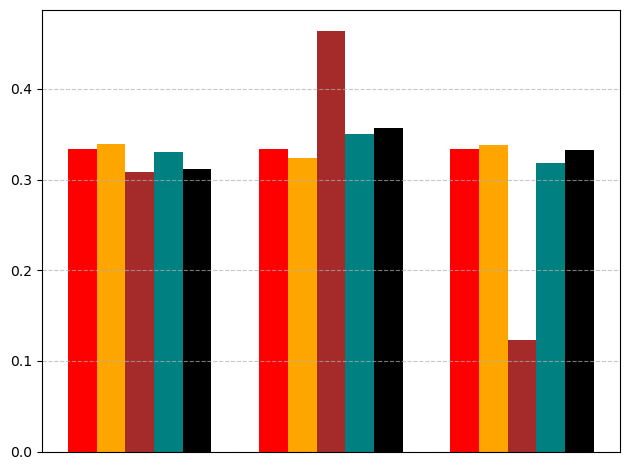

In [136]:
# ------ kitten d3 trials ------
our_d3_probs = [0.32833 + 0.01, 0.29411 + 0.029, 0.2488 + 0.0139 + 0.0745]
our_d3_probs = [p/sum(our_d3_probs) for p in our_d3_probs]
Bullet_d3_probs   = [0.308, 0.46388 , 0.10+0.01+0.013]
# Bullet_d3_probs   = [c/sum(Bullet_d3_probs) for c in Bullet_d3_probs]
IPC_d3_probs      = [0.3301, 0.35, 0.04 + 0.145 + 0.1326]
IPC_d3_probs      = [c/sum(IPC_d3_probs) for c in IPC_d3_probs]

print("bullet invalids: ", (1- sum(Bullet_d3_probs)), "% " , (1- sum(Bullet_d3_probs))*1212)

# choose null hypothesis
expected_d3_probs = IPC_d3_probs

#
observed_d3_freq = [103, 118, 110]
m = sum(observed_d3_freq)
observed_d3_probs = [c/sum(observed_d3_freq) for c in observed_d3_freq]

theoretical_probs = [1/3,1/3,1/3]
#total rolls
print("total samples", sum(observed_d3_freq))

expected_d3_freq = [p * m for p in expected_d3_probs]
# chi_squared_stat, p_value = chisquare(f_obs=observed_d3_freq, f_exp=expected_d3_freq)
# print("total samples", sum(observed_d3_freq))
# print(f"Chi-squared statistic: {chi_squared_stat:.4f}")
# print(f"P-value: {p_value:.4f}")

outcomes = [1,2,3]
plot_simulation_vs_experiment(outcomes, our_d3_probs, IPC_d3_probs, Bullet_d3_probs, observed_d3_probs, "experiment",
                              theoretical_probs=theoretical_probs,
                              save=True, save_title="kitten_d3_experiments")
# write_to_CSV("./CSVs/kitten_d3.csv", our_d3_probs, IPC_d3_probs, Bullet_d3_probs, observed_d3_probs, outcomes, m)

total samples 330


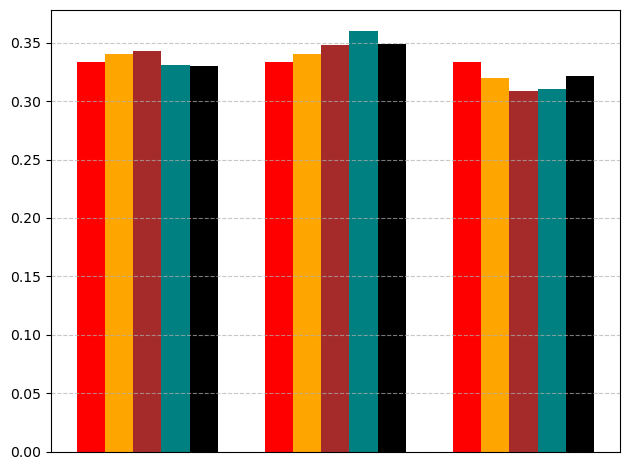

In [137]:
# ------ armadilo d3 trials ------
our_d3_probs = [0.34, 0.34 , 0.32]
our_d3_probs = [p/sum(our_d3_probs) for p in our_d3_probs]
Bullet_d3_probs   = [0.342, 0.347 , 0.308]
Bullet_d3_probs   = [c/sum(Bullet_d3_probs) for c in Bullet_d3_probs]
#processing
IPC_d3_probs      = [0.331,0.36,0.31]
# IPC_d3_probs      = [c/sum(IPC_d3_probs) for c in IPC_d3_probs]

# choose null hypothesis
expected_d3_probs = our_d3_probs

observed_d3_freq1 = [109, 115, 106]
observed_d3_freq = observed_d3_freq1
m = sum(observed_d3_freq)
observed_d3_probs = [c/sum(observed_d3_freq) for c in observed_d3_freq]

theoretical_probs = [1/3,1/3,1/3]
#total rolls
print("total samples", sum(observed_d3_freq))

outcomes = [1,2,3]
plot_simulation_vs_experiment(outcomes, our_d3_probs, IPC_d3_probs, Bullet_d3_probs, observed_d3_probs, "experiment",
                              theoretical_probs=theoretical_probs,
                              save=True, save_title="armadilo_d3_experiments")
# write_to_CSV("./CSVs/armadilo_d3.csv", our_d3_probs, IPC_d3_probs, Bullet_d3_probs, observed_d3_probs, outcomes, m)

total samples 406


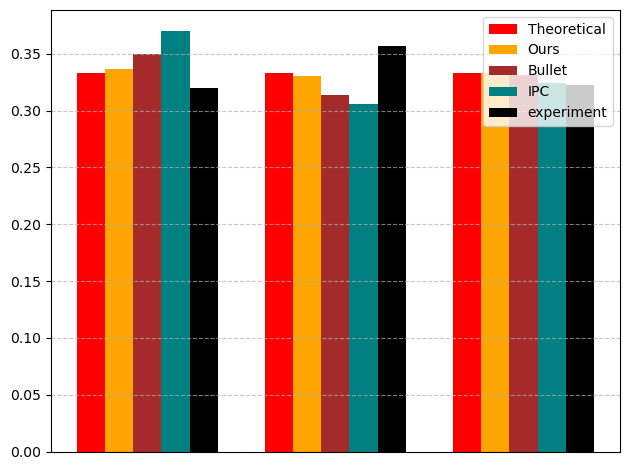

In [144]:
# ------ xyz_dragon d3 trials ------

our_d3_probs = [0.34, 0.333, 0.336]
our_d3_probs = [p/sum(our_d3_probs) for p in our_d3_probs]

Bullet_d3_probs   = [0.35,0.314,0.331]
IPC_d3_probs      = [0.37,0.306,0.324]
IPC_d3_probs = [p/sum(IPC_d3_probs) for p in IPC_d3_probs]

observed_d3_freq = [130, 145, 131]
observed_d3_prob = [p/sum(observed_d3_freq) for p in observed_d3_freq]

theoretical_probs = [1/3,1/3,1/3]
#total rolls
print("total samples", sum(observed_d3_freq))

outcomes = [1,2,3]
plot_simulation_vs_experiment(outcomes, our_d3_probs, IPC_d3_probs, Bullet_d3_probs, observed_d3_prob, "experiment",
                              theoretical_probs=theoretical_probs,
                              save=True, save_title="xyz_d3_experiments")
write_to_CSV("./CSVs/dragon_d3.csv", our_d3_probs, IPC_d3_probs, Bullet_d3_probs, observed_d3_prob, outcomes, sum(observed_d3_freq))

bullet invalids:  0.10999999999999999 %  133.32
total samples 700


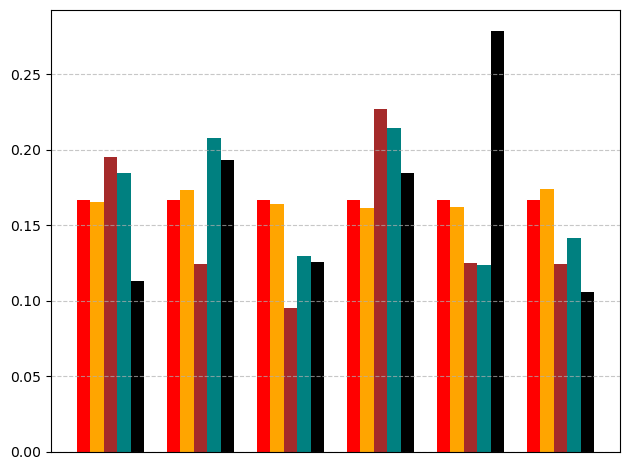

In [139]:
# ------ Bunny d6 trials ------

our_d6_probs = [0.165, 0.173, 0.164, 0.161, 0.162, 0.1735]
our_d6_probs = [p/sum(our_d6_probs) for p in our_d6_probs]

IPC_d6_probs = [0.184, 0.207, 0.129, 0.214, 0.123 , 0.141]
IPC_d6_probs = [p/sum(IPC_d6_probs) for p in IPC_d6_probs]

Bullet_d6_probs = [0.195, 0.124, 0.095, 0.227, 0.125, 0.124]
print("bullet invalids: ", (1- sum(Bullet_d6_probs)), "% " , (1- sum(Bullet_d6_probs))*1212)

observed_d6_freq = [ 79, 135, 88, 129, 195, 74]
observed_d6_prob = [p/sum(observed_d6_freq) for p in observed_d6_freq]

theoretical_probs = [1/6,1/6,1/6,1/6,1/6,1/6]
#total rolls
print("total samples", sum(observed_d6_freq))

outcomes = [1,2,3,4,5,6]
plot_simulation_vs_experiment(outcomes, our_d6_probs, IPC_d6_probs, Bullet_d6_probs, observed_d6_prob, "experiment",
                              theoretical_probs=theoretical_probs,
                              save=True, save_title="bunny_d6_experiments")
# write_to_CSV("./CSVs/bunny_d6.csv", our_d6_probs, IPC_d6_probs, Bullet_d6_probs, observed_d6_prob, outcomes, sum(observed_d6_freq))


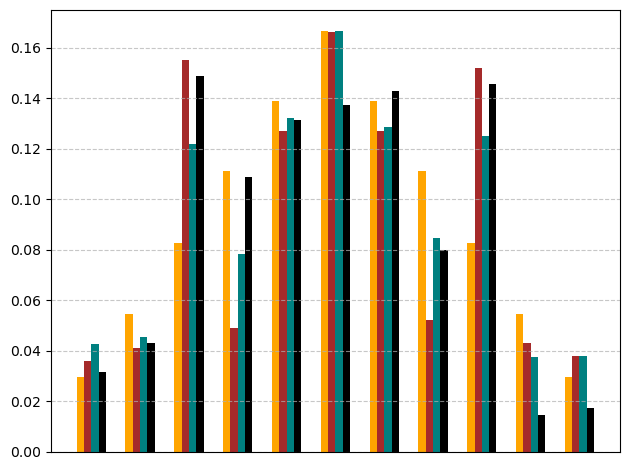

In [140]:
# ------ 2d6 version 2 trials ------

our_2d6_probs = [0.0295365, 0.0544441, 0.0825698, 0.111264, 0.138921, 0.16643, 0.138921, 0.111264, 0.0825698, 0.0545431, 0.0295365]
our_2d6_probs = [p/sum(our_2d6_probs) for p in our_2d6_probs]

IPC_2d6_probs = [0.0427636,  0.0451971, 0.121782, 0.0781436, 0.13212, 0.166582, 0.128597, 0.0844586,  0.125001, 0.037488, 0.0378667]
IPC_2d6_probs = [p/sum(IPC_2d6_probs) for p in IPC_2d6_probs]

Bullet_2d6_probs = [0.036, 0.041, 0.155, 0.049, 0.127, 0.166, 0.127, 0.052, 0.152, 0.043, 0.038 ]

observed_2d6_freq = [  11,  15,  52,  38,  46,  48,  50,  28,  51,  5,  6]
observed_2d6_prob = [p/sum(observed_2d6_freq) for p in observed_2d6_freq]

theoretical_probs = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]

# IPC_2d6_probs = [0,0,0,0,0,0,0,0,0,0,0]
# observed_2d6_prob = [0,0,0,0,0,0,0,0,0,0,0]

outcomes = [2,3,4,5,6,7,8,9,10,11,12]
plot_simulation_vs_experiment(outcomes, our_2d6_probs, IPC_2d6_probs, Bullet_2d6_probs, observed_2d6_prob, "experiment", theoretical_probs = None,
                              save=False, save_title="2d6_V2_experiments")

total samples 1122


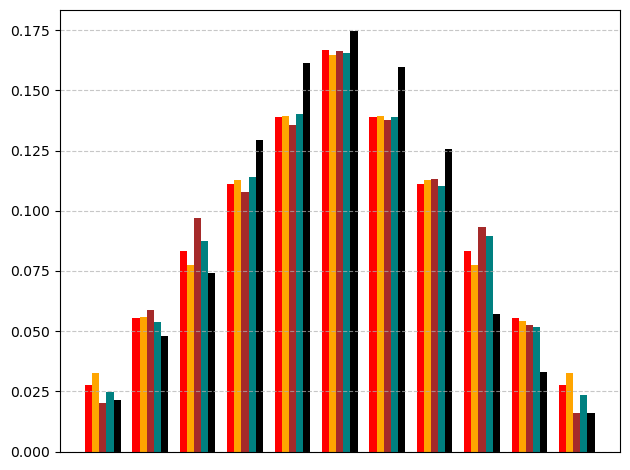

In [160]:
# ------ 2d6 version 5 trials ------

our_2d6_probs =    [0.0327318, 0.0557293, 0.0776648, 0.112774, 0.139526, 0.164631, 0.139526, 0.112774, 0.0776648,0.0542467, 0.0327318]
Bullet_2d6_probs = [0.0201296, 0.0587061, 0.0968078, 0.107655, 0.135824, 0.166377, 0.137677, 0.113411, 0.093407, 0.0524294, 0.0159246]
IPC_2d6_probs = [0.0246734, 0.0538708, 0.0876514, 0.1141, 0.14017, 0.165485, 0.138919, 0.110405, 0.0895894, 0.0515575, 0.0235776]

IPC_2d6_probs = [p/sum(IPC_2d6_probs) for p in IPC_2d6_probs]
our_2d6_probs = [p/sum(our_2d6_probs) for p in our_2d6_probs]



observed_2d6_freq1  =    [12,  31,  53,  78,  104,  106,
                          92,  78,  39, 23, 10]
observed_2d6_freq1_new = [1, 10, 26, 54, 58, 51,
                          60, 60, 29, 10, 4]
observed_2d6_freq2 =     [  7,  20,  19,  49,  64,  62,
                            80,  38,  22,  10,  3]
observed_2d6_freq2_new = [  12, 23, 30, 67, 77, 90,
                            87, 63, 25, 14, 8]
# observed_2d6_freq = observed_2d6_freq1
# observed_2d6_freq = [a+b for a,b in zip(observed_2d6_freq1, observed_2d6_freq1_new)]
observed_2d6_freq = [a+b for a,b in zip(observed_2d6_freq2_new, observed_2d6_freq1)]
# observed_2d6_freq = [f1 + f2 for f1,f2 in zip(observed_2d6_freq1, observed_2d6_freq2)]
observed_2d6_prob = [p/sum(observed_2d6_freq) for p in observed_2d6_freq]
# observed_2d6_prob = [0,0,0,0,0,0,0,0,0,0,0]

print("total samples", sum(observed_2d6_freq))

theoretical_probs = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]

outcomes = [2,3,4,5,6,7,8,9,10,11,12]
plot_simulation_vs_experiment(outcomes, our_2d6_probs, IPC_2d6_probs, Bullet_2d6_probs, observed_2d6_prob, "experiment", theoretical_probs = theoretical_probs,
                              save=True, save_title="2d6_V5_experiments", total_rolls=sum(observed_2d6_freq))
# write_to_CSV("./CSVs/2d6_V5.csv", our_2d6_probs, IPC_2d6_probs, Bullet_2d6_probs, observed_2d6_prob, outcomes, sum(observed_2d6_freq))

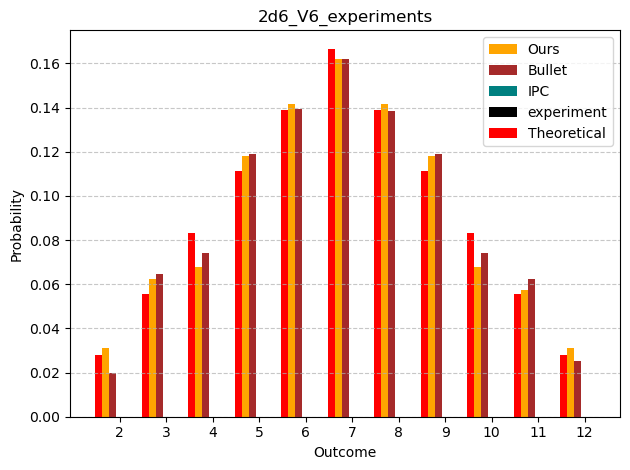

In [50]:
# ------ 2d6 version 6 trials ------
our_2d6_probs    = [0.0313402, 0.0623636, 0.0676089, 0.118254, 0.141778, 0.0810841+0.0810841,0.141778, 0.118254, 0.0676089,0.0575063, 0.0313402]
Bullet_2d6_probs = [0.0200045, 0.0647053, 0.073946 , 0.118976, 0.139579, 0.0891278+0.0730869,0.138268, 0.118976, 0.073946  ,0.062505, 0.0250792]

IPC_2d6_probs = [0,0,0,0,0,0,0,0,0,0,0]

our_2d6_probs = [p/sum(our_2d6_probs) for p in our_2d6_probs]
# IPC_2d6_probs = [p/sum(IPC_2d6_probs) for p in IPC_2d6_probs]


# observed_2d6_freq = [  11,  15,  52,  38,  46,  48,  50,  28,  51,  5,  6]
# observed_2d6_prob = [p/sum(observed_2d6_freq) for p in observed_2d6_freq]
observed_2d6_prob = [0,0,0,0,0,0,0,0,0,0,0]

theoretical_probs = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]

outcomes = [2,3,4,5,6,7,8,9,10,11,12]
plot_simulation_vs_experiment(outcomes, our_2d6_probs, IPC_2d6_probs, Bullet_2d6_probs, observed_2d6_prob, "experiment", theoretical_probs = theoretical_probs,
                              save=False, save_title="2d6_V6_experiments")
